In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.feature_selection import SelectKBest, f_regression, mutual_info_regression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import warnings
warnings.filterwarnings('ignore')

# Load the dataset
df = pd.read_csv('/kaggle/input/housing-prices-dataset/Housing.csv')
print("Dataset Shape:", df.shape)
df.head()

Dataset Shape: (545, 13)


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [2]:
# Basic information about the dataset
print("="*50)
print("DATASET INFORMATION")
print("="*50)
print(f"\nShape: {df.shape}")
print(f"\nColumn Names:\n{df.columns.tolist()}")

# Data types
print("\n" + "="*50)
print("DATA TYPES")
print("="*50)
print(df.dtypes)

# Statistical summary
print("\n" + "="*50)
print("STATISTICAL SUMMARY")
print("="*50)
print(df.describe())

# Check for missing values
print("\n" + "="*50)
print("MISSING VALUES")
print("="*50)
print(df.isnull().sum())

# Check for duplicates
print(f"\nDuplicate Rows: {df.duplicated().sum()}")

DATASET INFORMATION

Shape: (545, 13)

Column Names:
['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'parking', 'prefarea', 'furnishingstatus']

DATA TYPES
price                int64
area                 int64
bedrooms             int64
bathrooms            int64
stories              int64
mainroad            object
guestroom           object
basement            object
hotwaterheating     object
airconditioning     object
parking              int64
prefarea            object
furnishingstatus    object
dtype: object

STATISTICAL SUMMARY
              price          area    bedrooms   bathrooms     stories  \
count  5.450000e+02    545.000000  545.000000  545.000000  545.000000   
mean   4.766729e+06   5150.541284    2.965138    1.286239    1.805505   
std    1.870440e+06   2170.141023    0.738064    0.502470    0.867492   
min    1.750000e+06   1650.000000    1.000000    1.000000    1.000000   
25%    3.430

In [3]:
# Identify numerical and categorical columns
numerical_cols = df.select_dtypes(include=[np.number]).columns.tolist()
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()

print(f"Numerical Columns: {numerical_cols}")
print(f"Categorical Columns: {categorical_cols}")

Numerical Columns: ['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'parking']
Categorical Columns: ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea', 'furnishingstatus']


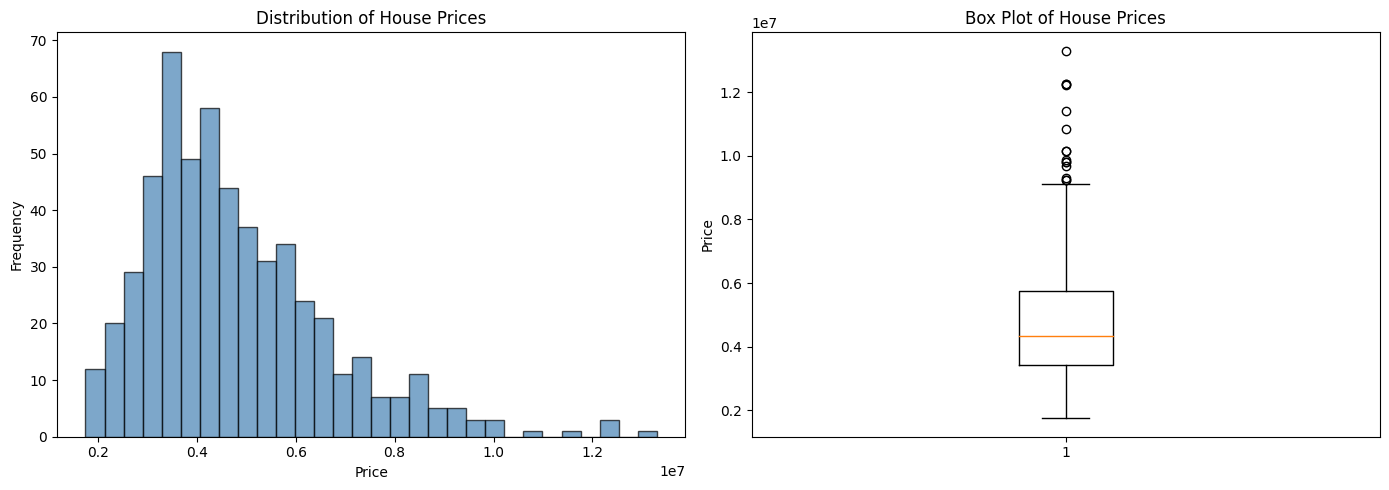

Price Statistics:
Mean: $4,766,729.25
Median: $4,340,000.00
Std: $1,870,439.62
Min: $1,750,000.00
Max: $13,300,000.00
Skewness: 1.21


In [4]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Histogram
axes[0].hist(df['price'], bins=30, edgecolor='black', alpha=0.7, color='steelblue')
axes[0].set_xlabel('Price')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Distribution of House Prices')

# Box plot
axes[1].boxplot(df['price'], vert=True)
axes[1].set_ylabel('Price')
axes[1].set_title('Box Plot of House Prices')

plt.tight_layout()
plt.show()

# Price statistics
print("Price Statistics:")
print(f"Mean: ${df['price'].mean():,.2f}")
print(f"Median: ${df['price'].median():,.2f}")
print(f"Std: ${df['price'].std():,.2f}")
print(f"Min: ${df['price'].min():,.2f}")
print(f"Max: ${df['price'].max():,.2f}")
print(f"Skewness: {df['price'].skew():.2f}")

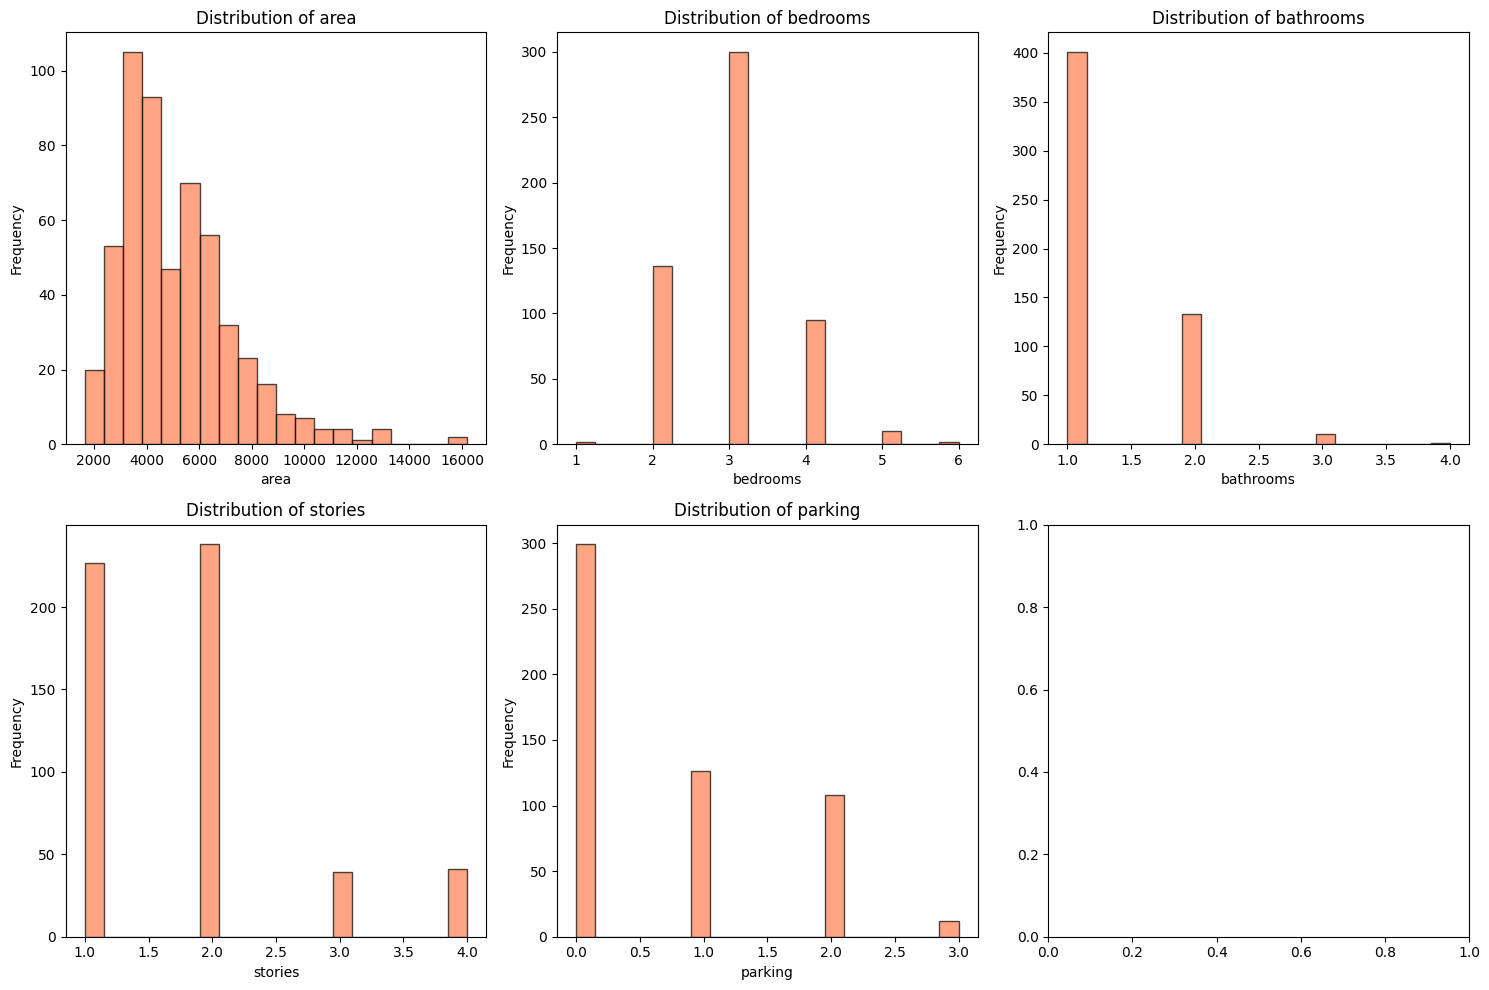

In [5]:
num_features = [col for col in numerical_cols if col != 'price']

fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.flatten()

for idx, col in enumerate(num_features):
    axes[idx].hist(df[col], bins=20, edgecolor='black', alpha=0.7, color='coral')
    axes[idx].set_xlabel(col)
    axes[idx].set_ylabel('Frequency')
    axes[idx].set_title(f'Distribution of {col}')

plt.tight_layout()
plt.show()

IndexError: index 6 is out of bounds for axis 0 with size 6

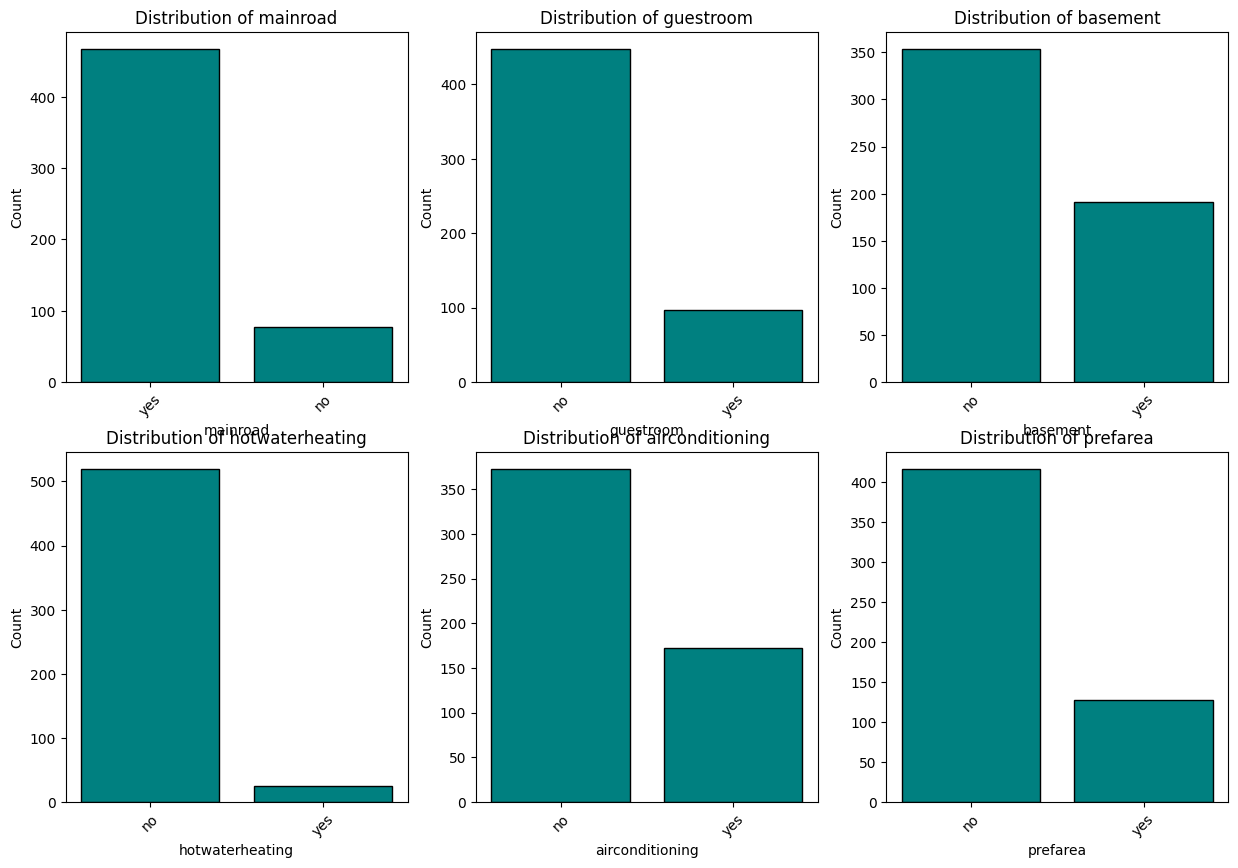

In [6]:
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.flatten()

for idx, col in enumerate(categorical_cols):
    value_counts = df[col].value_counts()
    axes[idx].bar(value_counts.index, value_counts.values, color='teal', edgecolor='black')
    axes[idx].set_xlabel(col)
    axes[idx].set_ylabel('Count')
    axes[idx].set_title(f'Distribution of {col}')
    axes[idx].tick_params(axis='x', rotation=45)

# Hide empty subplots if any
for idx in range(len(categorical_cols), len(axes)):
    axes[idx].set_visible(False)

plt.tight_layout()
plt.show()

IndexError: index 6 is out of bounds for axis 0 with size 6

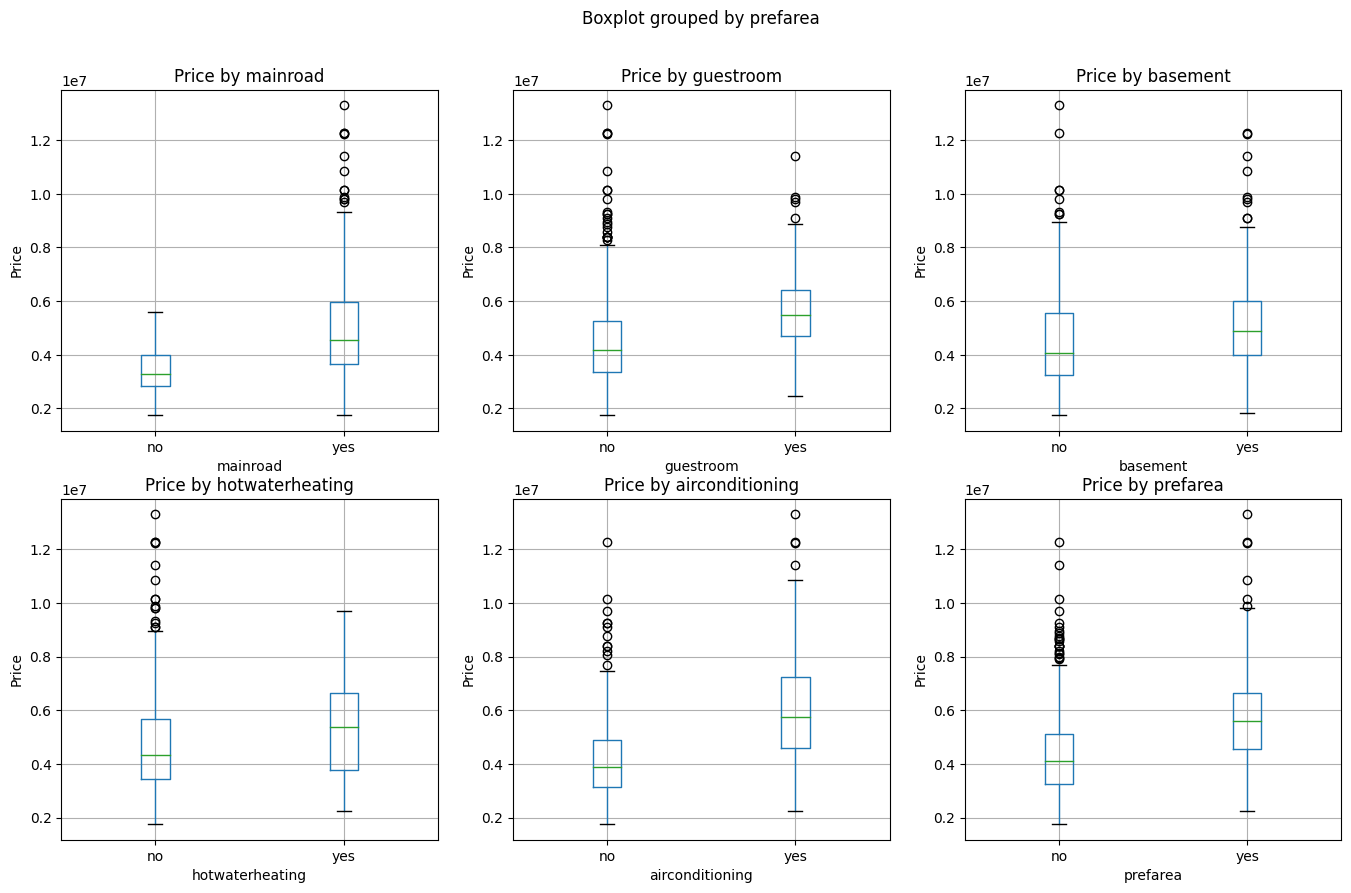

In [7]:
fig, axes = plt.subplots(2, 3, figsize=(16, 10))
axes = axes.flatten()

for idx, col in enumerate(categorical_cols):
    df.boxplot(column='price', by=col, ax=axes[idx])
    axes[idx].set_xlabel(col)
    axes[idx].set_ylabel('Price')
    axes[idx].set_title(f'Price by {col}')

for idx in range(len(categorical_cols), len(axes)):
    axes[idx].set_visible(False)

plt.suptitle('')
plt.tight_layout()
plt.show()

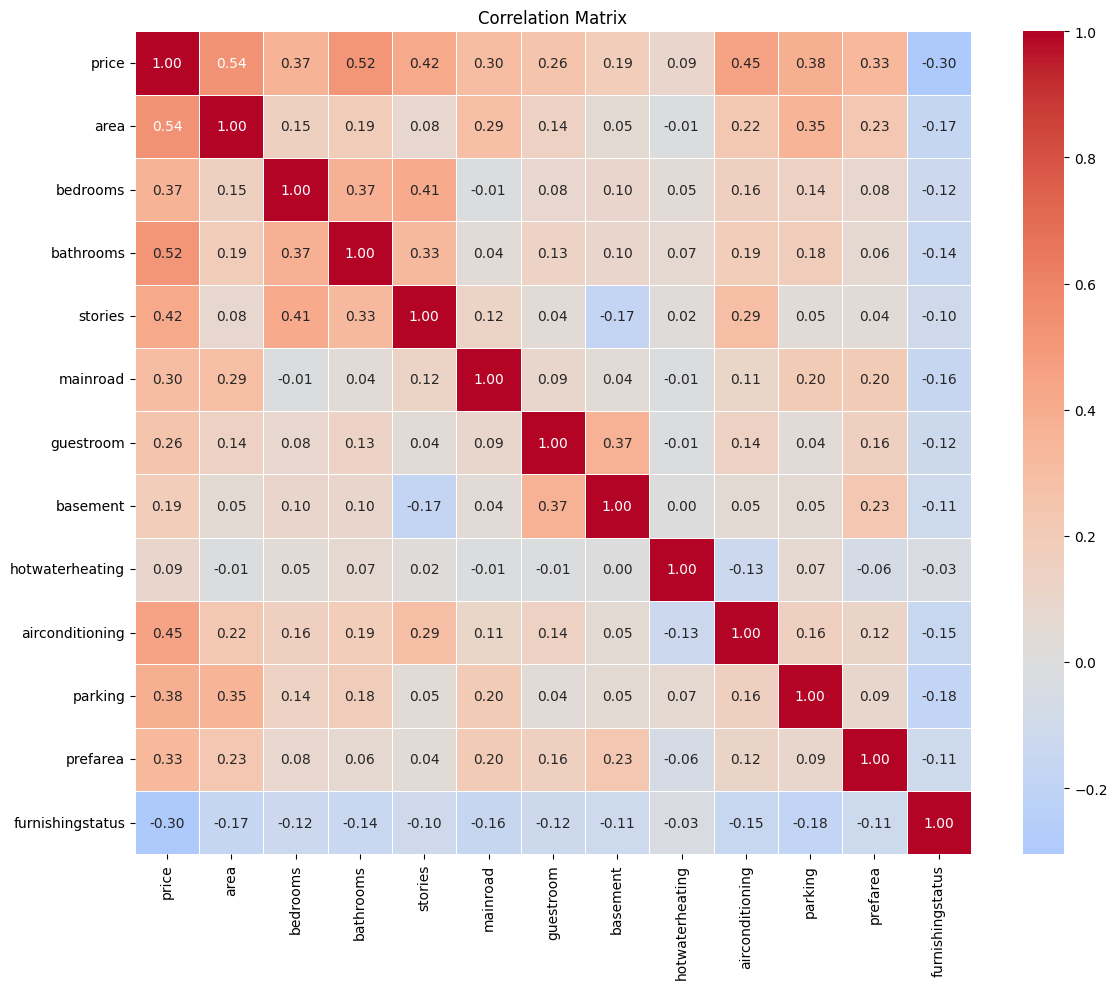


Correlation with Price:
price               1.000000
area                0.535997
bathrooms           0.517545
airconditioning     0.452954
stories             0.420712
parking             0.384394
bedrooms            0.366494
prefarea            0.329777
mainroad            0.296898
guestroom           0.255517
basement            0.187057
hotwaterheating     0.093073
furnishingstatus   -0.304721
Name: price, dtype: float64


In [8]:
# Encode categorical variables for correlation
df_encoded = df.copy()
for col in categorical_cols:
    df_encoded[col] = LabelEncoder().fit_transform(df_encoded[col])

# Correlation matrix
plt.figure(figsize=(12, 10))
correlation_matrix = df_encoded.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, 
            fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.tight_layout()
plt.show()

# Correlation with price
print("\nCorrelation with Price:")
print(correlation_matrix['price'].sort_values(ascending=False))

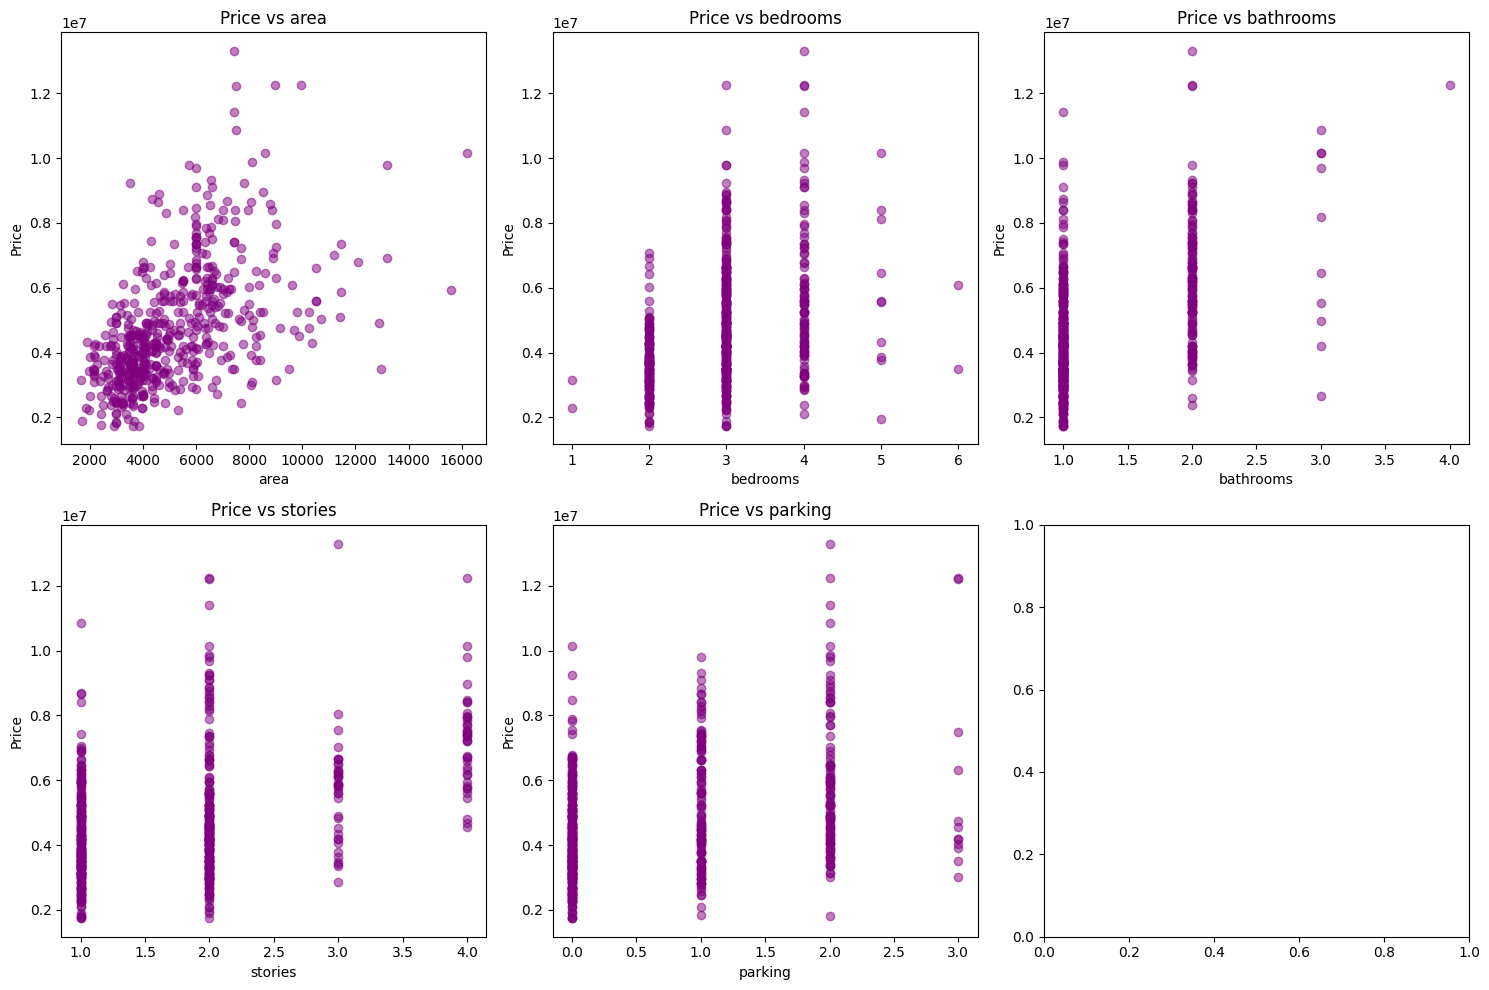

In [9]:
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.flatten()

for idx, col in enumerate(num_features):
    axes[idx].scatter(df[col], df['price'], alpha=0.5, color='purple')
    axes[idx].set_xlabel(col)
    axes[idx].set_ylabel('Price')
    axes[idx].set_title(f'Price vs {col}')

plt.tight_layout()
plt.show()

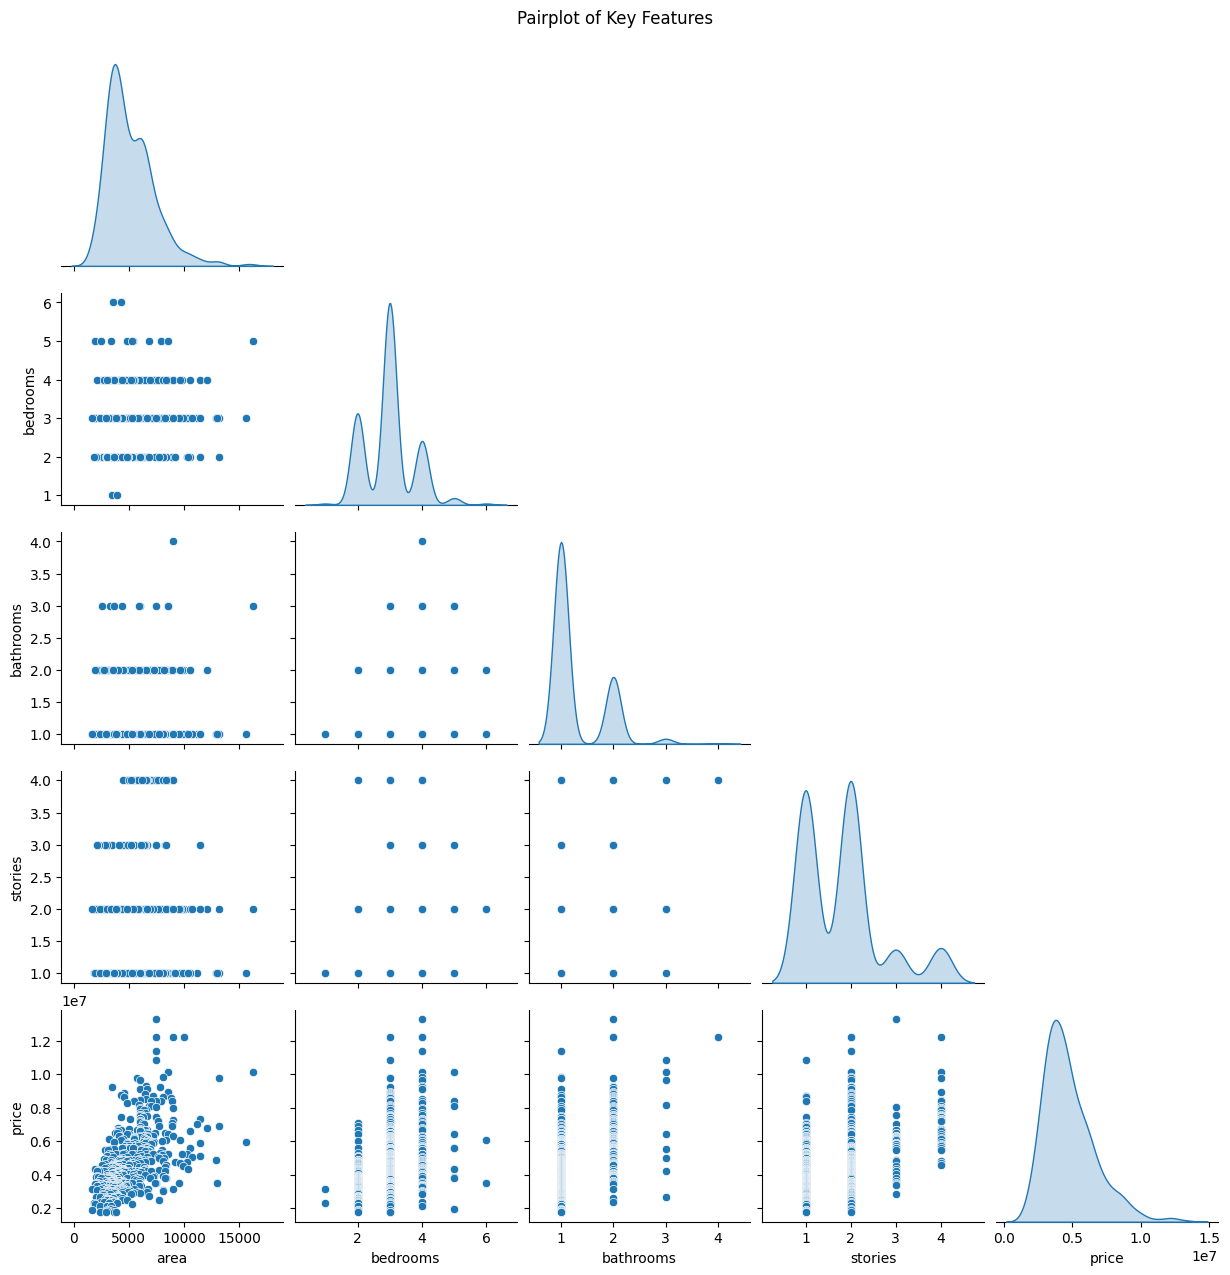

In [10]:
key_features = ['area', 'bedrooms', 'bathrooms', 'stories', 'price']
sns.pairplot(df[key_features], diag_kind='kde', corner=True)
plt.suptitle('Pairplot of Key Features', y=1.02)
plt.show()

In [11]:
# Check unique values in categorical columns
print("Unique Values in Categorical Columns:")
for col in categorical_cols:
    print(f"{col}: {df[col].unique()}")

Unique Values in Categorical Columns:
mainroad: ['yes' 'no']
guestroom: ['no' 'yes']
basement: ['no' 'yes']
hotwaterheating: ['no' 'yes']
airconditioning: ['yes' 'no']
prefarea: ['yes' 'no']
furnishingstatus: ['furnished' 'semi-furnished' 'unfurnished']


In [12]:
# Define X and y
X = df.drop('price', axis=1)
y = df['price']

print(f"Features Shape: {X.shape}")
print(f"Target Shape: {y.shape}")

# Update column lists
numerical_features = X.select_dtypes(include=[np.number]).columns.tolist()
categorical_features = X.select_dtypes(include=['object']).columns.tolist()

print(f"\nNumerical Features: {numerical_features}")
print(f"Categorical Features: {categorical_features}")

Features Shape: (545, 12)
Target Shape: (545,)

Numerical Features: ['area', 'bedrooms', 'bathrooms', 'stories', 'parking']
Categorical Features: ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea', 'furnishingstatus']


In [13]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print(f"Training Set: {X_train.shape}")
print(f"Test Set: {X_test.shape}")

Training Set: (436, 12)
Test Set: (109, 12)


Feature Selection - F-Regression Scores:
             Feature     F_Score       P_Value
0               area  218.884081  7.388225e-42
2          bathrooms  198.654521  1.139322e-38
8    airconditioning  140.162721  6.310970e-29
3            stories  116.780402  8.668397e-25
9            parking   94.143328  1.238378e-20
1           bedrooms   84.251022  9.080302e-19
10          prefarea   66.258646  2.718374e-15
11  furnishingstatus   55.581375  3.565968e-13
4           mainroad   52.491839  1.490104e-12
5          guestroom   37.928276  1.429114e-09
6           basement   19.688569  1.104105e-05
7    hotwaterheating    4.744870  2.981524e-02

Feature Selection - Mutual Information Scores:
             Feature  MI_Score
0               area  0.178983
9            parking  0.134525
2          bathrooms  0.126895
3            stories  0.123166
11  furnishingstatus  0.110777
8    airconditioning  0.104423
1           bedrooms  0.095743
5          guestroom  0.090340
4           mainroad 

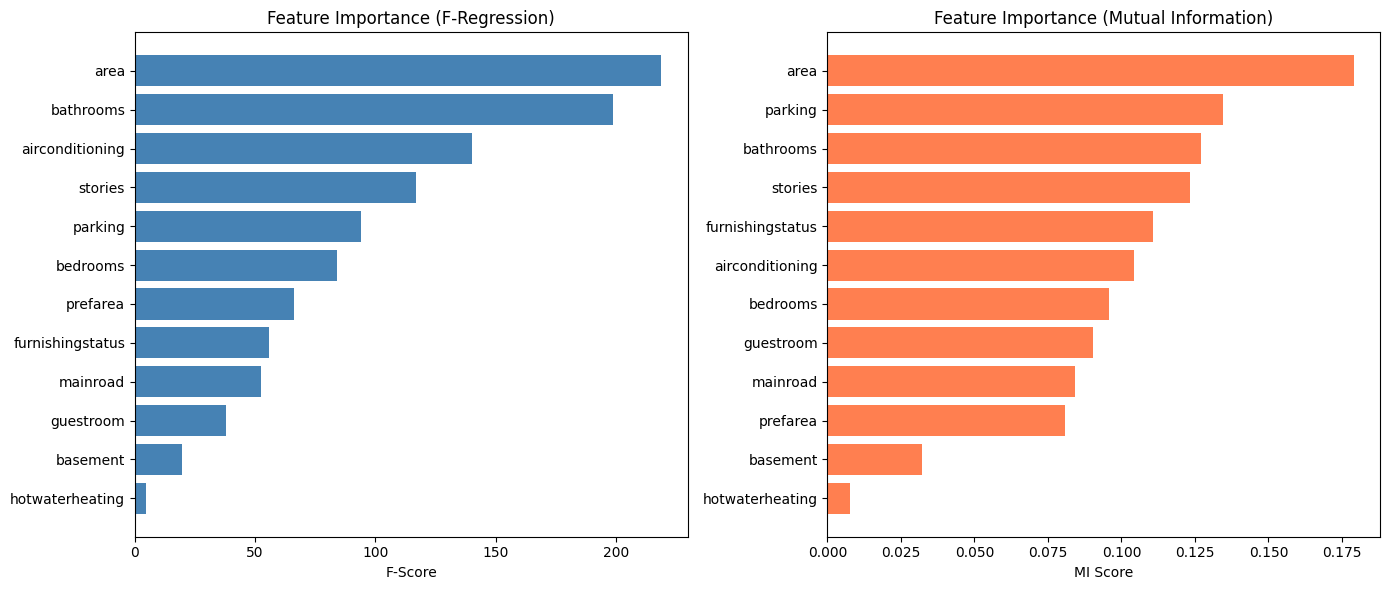

In [14]:
# Temporarily encode categorical variables for feature selection
X_temp = X.copy()
for col in categorical_features:
    X_temp[col] = LabelEncoder().fit_transform(X_temp[col])

# Method 1: SelectKBest with f_regression
selector_f = SelectKBest(score_func=f_regression, k='all')
selector_f.fit(X_temp, y)

feature_scores_f = pd.DataFrame({
    'Feature': X_temp.columns,
    'F_Score': selector_f.scores_,
    'P_Value': selector_f.pvalues_
}).sort_values('F_Score', ascending=False)

print("Feature Selection - F-Regression Scores:")
print(feature_scores_f)

# Method 2: Mutual Information
selector_mi = SelectKBest(score_func=mutual_info_regression, k='all')
selector_mi.fit(X_temp, y)

feature_scores_mi = pd.DataFrame({
    'Feature': X_temp.columns,
    'MI_Score': selector_mi.scores_
}).sort_values('MI_Score', ascending=False)

print("\nFeature Selection - Mutual Information Scores:")
print(feature_scores_mi)

# Visualize feature importance
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# F-Score
axes[0].barh(feature_scores_f['Feature'], feature_scores_f['F_Score'], color='steelblue')
axes[0].set_xlabel('F-Score')
axes[0].set_title('Feature Importance (F-Regression)')
axes[0].invert_yaxis()

# Mutual Information
axes[1].barh(feature_scores_mi['Feature'], feature_scores_mi['MI_Score'], color='coral')
axes[1].set_xlabel('MI Score')
axes[1].set_title('Feature Importance (Mutual Information)')
axes[1].invert_yaxis()

plt.tight_layout()
plt.show()

In [15]:
# Preprocessing for numerical features
numerical_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

# Preprocessing for categorical features
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(drop='first', sparse_output=False, handle_unknown='ignore'))
])

# Combine preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

print("Preprocessor created successfully!")

Preprocessor created successfully!


In [16]:
# Decision Tree Pipeline
dt_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', DecisionTreeRegressor(random_state=42))
])

# Train the model
dt_pipeline.fit(X_train, y_train)

# Predictions
y_pred_dt = dt_pipeline.predict(X_test)

# Evaluation
print("="*50)
print("DECISION TREE REGRESSOR")
print("="*50)
print(f"R² Score: {r2_score(y_test, y_pred_dt):.4f}")
print(f"MAE: ${mean_absolute_error(y_test, y_pred_dt):,.2f}")
print(f"RMSE: ${np.sqrt(mean_squared_error(y_test, y_pred_dt)):,.2f}")

# Cross-validation
cv_scores_dt = cross_val_score(dt_pipeline, X, y, cv=5, scoring='r2')
print(f"Cross-Validation R² (mean ± std): {cv_scores_dt.mean():.4f} ± {cv_scores_dt.std():.4f}")

DECISION TREE REGRESSOR
R² Score: 0.4771
MAE: $1,195,266.06
RMSE: $1,625,669.90
Cross-Validation R² (mean ± std): -26.9029 ± 17.8916


In [17]:
# Random Forest Pipeline
rf_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(n_estimators=100, random_state=42))
])

# Train the model
rf_pipeline.fit(X_train, y_train)

# Predictions
y_pred_rf = rf_pipeline.predict(X_test)

# Evaluation
print("="*50)
print("RANDOM FOREST REGRESSOR")
print("="*50)
print(f"R² Score: {r2_score(y_test, y_pred_rf):.4f}")
print(f"MAE: ${mean_absolute_error(y_test, y_pred_rf):,.2f}")
print(f"RMSE: ${np.sqrt(mean_squared_error(y_test, y_pred_rf)):,.2f}")

# Cross-validation
cv_scores_rf = cross_val_score(rf_pipeline, X, y, cv=5, scoring='r2')
print(f"Cross-Validation R² (mean ± std): {cv_scores_rf.mean():.4f} ± {cv_scores_rf.std():.4f}")

RANDOM FOREST REGRESSOR
R² Score: 0.6124
MAE: $1,021,151.08
RMSE: $1,399,758.20
Cross-Validation R² (mean ± std): -12.1015 ± 6.5435


In [18]:
# Gradient Boosting Pipeline
gb_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', GradientBoostingRegressor(n_estimators=100, random_state=42))
])

# Train the model
gb_pipeline.fit(X_train, y_train)

# Predictions
y_pred_gb = gb_pipeline.predict(X_test)

# Evaluation
print("="*50)
print("GRADIENT BOOSTING REGRESSOR")
print("="*50)
print(f"R² Score: {r2_score(y_test, y_pred_gb):.4f}")
print(f"MAE: ${mean_absolute_error(y_test, y_pred_gb):,.2f}")
print(f"RMSE: ${np.sqrt(mean_squared_error(y_test, y_pred_gb)):,.2f}")

# Cross-validation
cv_scores_gb = cross_val_score(gb_pipeline, X, y, cv=5, scoring='r2')
print(f"Cross-Validation R² (mean ± std): {cv_scores_gb.mean():.4f} ± {cv_scores_gb.std():.4f}")

GRADIENT BOOSTING REGRESSOR
R² Score: 0.6660
MAE: $959,748.96
RMSE: $1,299,385.98
Cross-Validation R² (mean ± std): -10.8454 ± 5.6779


In [19]:
# AdaBoost Pipeline
ab_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', AdaBoostRegressor(n_estimators=100, random_state=42))
])

# Train the model
ab_pipeline.fit(X_train, y_train)

# Predictions
y_pred_ab = ab_pipeline.predict(X_test)

# Evaluation
print("="*50)
print("ADABOOST REGRESSOR")
print("="*50)
print(f"R² Score: {r2_score(y_test, y_pred_ab):.4f}")
print(f"MAE: ${mean_absolute_error(y_test, y_pred_ab):,.2f}")
print(f"RMSE: ${np.sqrt(mean_squared_error(y_test, y_pred_ab)):,.2f}")

# Cross-validation
cv_scores_ab = cross_val_score(ab_pipeline, X, y, cv=5, scoring='r2')
print(f"Cross-Validation R² (mean ± std): {cv_scores_ab.mean():.4f} ± {cv_scores_ab.std():.4f}")

ADABOOST REGRESSOR
R² Score: 0.5665
MAE: $1,112,285.46
RMSE: $1,480,213.85
Cross-Validation R² (mean ± std): -17.6363 ± 12.1738



MODEL COMPARISON
            Model  R² Score          MAE         RMSE  CV Mean R²
Gradient Boosting  0.665965 9.597490e+05 1.299386e+06  -10.845394
    Random Forest  0.612366 1.021151e+06 1.399758e+06  -12.101452
         AdaBoost  0.566524 1.112285e+06 1.480214e+06  -17.636289
    Decision Tree  0.477146 1.195266e+06 1.625670e+06  -26.902869


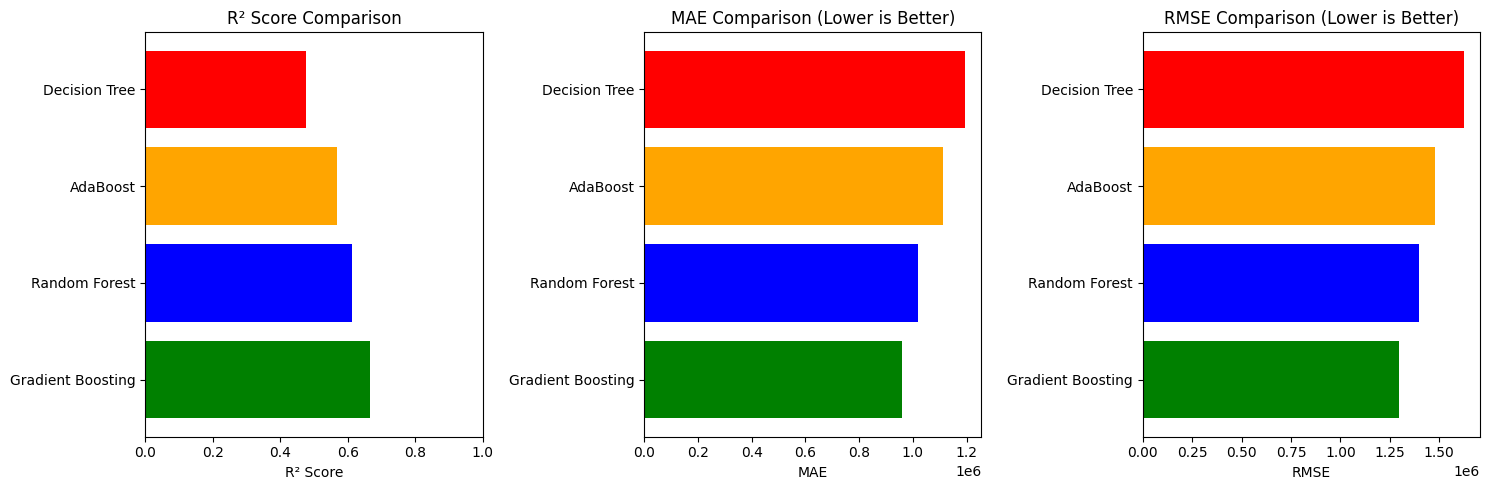

In [20]:
# Create comparison dataframe
results = pd.DataFrame({
    'Model': ['Decision Tree', 'Random Forest', 'Gradient Boosting', 'AdaBoost'],
    'R² Score': [
        r2_score(y_test, y_pred_dt),
        r2_score(y_test, y_pred_rf),
        r2_score(y_test, y_pred_gb),
        r2_score(y_test, y_pred_ab)
    ],
    'MAE': [
        mean_absolute_error(y_test, y_pred_dt),
        mean_absolute_error(y_test, y_pred_rf),
        mean_absolute_error(y_test, y_pred_gb),
        mean_absolute_error(y_test, y_pred_ab)
    ],
    'RMSE': [
        np.sqrt(mean_squared_error(y_test, y_pred_dt)),
        np.sqrt(mean_squared_error(y_test, y_pred_rf)),
        np.sqrt(mean_squared_error(y_test, y_pred_gb)),
        np.sqrt(mean_squared_error(y_test, y_pred_ab))
    ],
    'CV Mean R²': [
        cv_scores_dt.mean(),
        cv_scores_rf.mean(),
        cv_scores_gb.mean(),
        cv_scores_ab.mean()
    ]
})

results = results.sort_values('R² Score', ascending=False)
print("\nMODEL COMPARISON")
print("="*80)
print(results.to_string(index=False))

# Visualize comparison
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# R² Score
axes[0].barh(results['Model'], results['R² Score'], color=['green', 'blue', 'orange', 'red'])
axes[0].set_xlabel('R² Score')
axes[0].set_title('R² Score Comparison')
axes[0].set_xlim(0, 1)

# MAE
axes[1].barh(results['Model'], results['MAE'], color=['green', 'blue', 'orange', 'red'])
axes[1].set_xlabel('MAE')
axes[1].set_title('MAE Comparison (Lower is Better)')

# RMSE
axes[2].barh(results['Model'], results['RMSE'], color=['green', 'blue', 'orange', 'red'])
axes[2].set_xlabel('RMSE')
axes[2].set_title('RMSE Comparison (Lower is Better)')

plt.tight_layout()
plt.show()

In [21]:
# Hyperparameter tuning for Random Forest (typically best performer)
param_grid_rf = {
    'regressor__n_estimators': [50, 100, 200],
    'regressor__max_depth': [None, 10, 20, 30],
    'regressor__min_samples_split': [2, 5, 10],
    'regressor__min_samples_leaf': [1, 2, 4]
}

# Create pipeline
rf_pipeline_tuned = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(random_state=42))
])

# Grid Search
print("Performing Grid Search for Random Forest...")
grid_search = GridSearchCV(
    rf_pipeline_tuned, 
    param_grid_rf, 
    cv=5, 
    scoring='r2',
    n_jobs=-1,
    verbose=1
)

grid_search.fit(X_train, y_train)

print(f"\nBest Parameters: {grid_search.best_params_}")
print(f"Best CV Score: {grid_search.best_score_:.4f}")

# Evaluate best model
best_model = grid_search.best_estimator_
y_pred_best = best_model.predict(X_test)

print(f"\nTuned Random Forest Results:")
print(f"R² Score: {r2_score(y_test, y_pred_best):.4f}")
print(f"MAE: ${mean_absolute_error(y_test, y_pred_best):,.2f}")
print(f"RMSE: ${np.sqrt(mean_squared_error(y_test, y_pred_best)):,.2f}")

Performing Grid Search for Random Forest...
Fitting 5 folds for each of 108 candidates, totalling 540 fits

Best Parameters: {'regressor__max_depth': None, 'regressor__min_samples_leaf': 2, 'regressor__min_samples_split': 10, 'regressor__n_estimators': 50}
Best CV Score: 0.6176

Tuned Random Forest Results:
R² Score: 0.5845
MAE: $1,060,795.88
RMSE: $1,449,135.11



Feature Importance (Random Forest):
                            Feature  Importance
0                              area    0.497504
2                         bathrooms    0.163766
9               airconditioning_yes    0.066285
3                           stories    0.048304
1                          bedrooms    0.045255
4                           parking    0.044547
12     furnishingstatus_unfurnished    0.038482
7                      basement_yes    0.030719
10                     prefarea_yes    0.029238
8               hotwaterheating_yes    0.010877
6                     guestroom_yes    0.010630
11  furnishingstatus_semi-furnished    0.007495
5                      mainroad_yes    0.006899


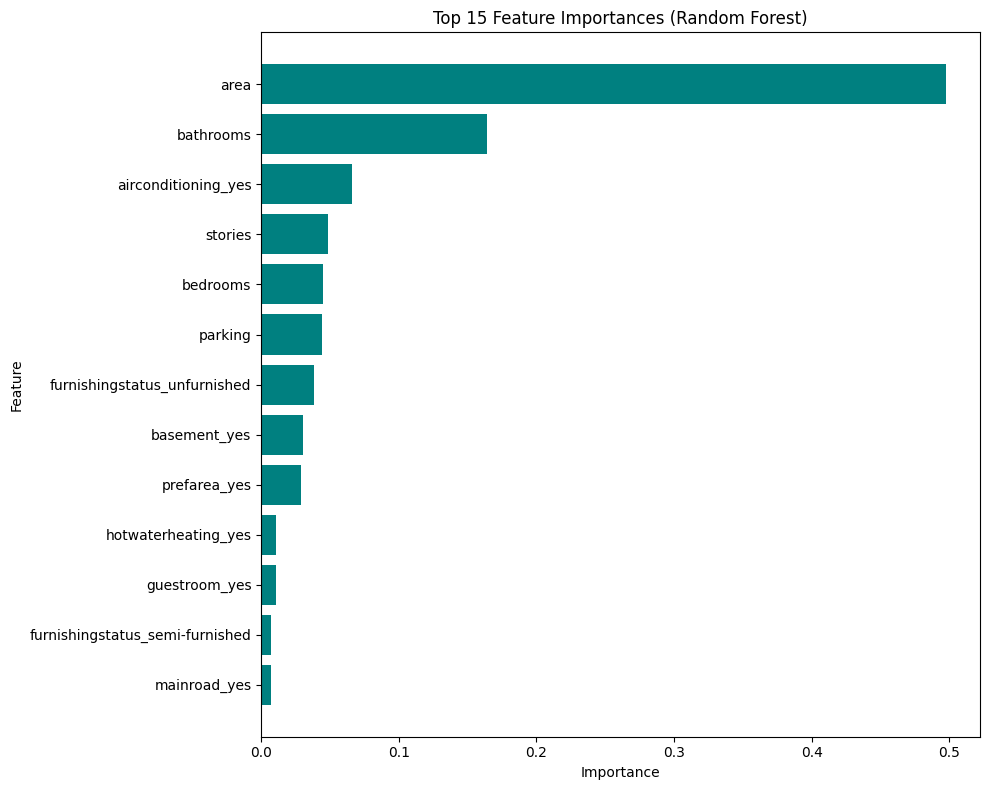

In [22]:
# Get feature names after preprocessing
feature_names = numerical_features.copy()

# Get categorical feature names after one-hot encoding
ohe = best_model.named_steps['preprocessor'].named_transformers_['cat'].named_steps['onehot']
cat_feature_names = ohe.get_feature_names_out(categorical_features).tolist()
feature_names.extend(cat_feature_names)

# Get feature importances
importances = best_model.named_steps['regressor'].feature_importances_

# Create DataFrame
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values('Importance', ascending=False)

print("\nFeature Importance (Random Forest):")
print(feature_importance_df.head(15))

# Visualize
plt.figure(figsize=(10, 8))
plt.barh(feature_importance_df['Feature'][:15], feature_importance_df['Importance'][:15], color='teal')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Top 15 Feature Importances (Random Forest)')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

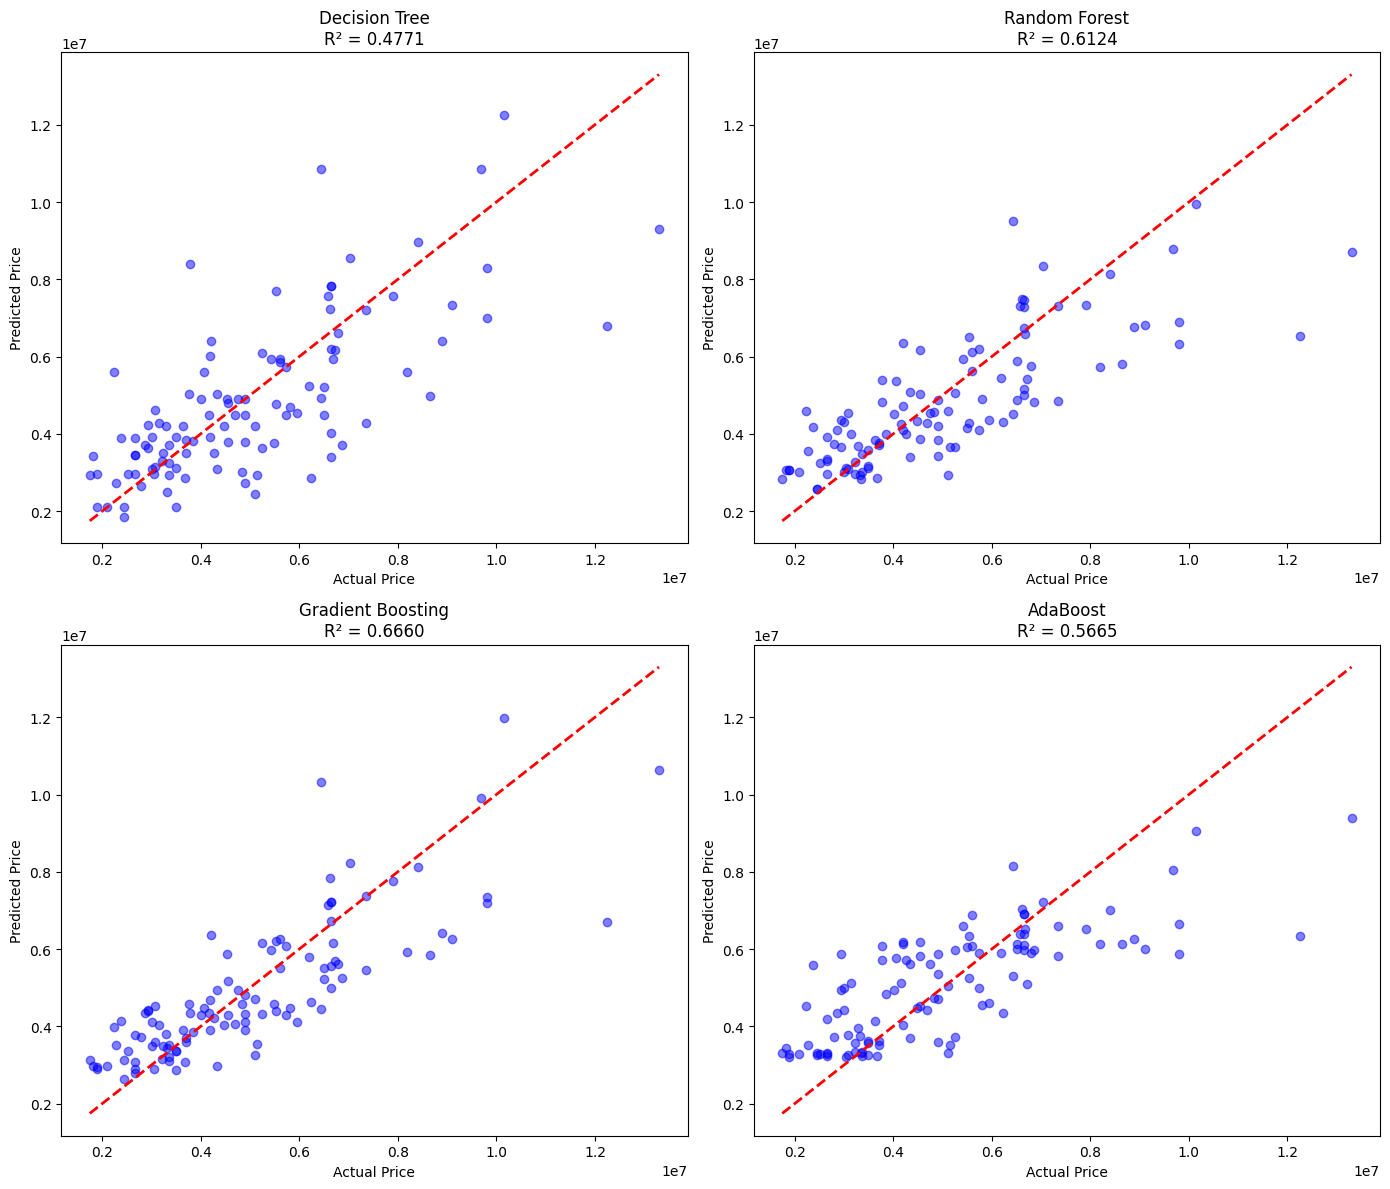

In [23]:
fig, axes = plt.subplots(2, 2, figsize=(14, 12))

models_pred = [
    ('Decision Tree', y_pred_dt),
    ('Random Forest', y_pred_rf),
    ('Gradient Boosting', y_pred_gb),
    ('AdaBoost', y_pred_ab)
]

for idx, (name, pred) in enumerate(models_pred):
    ax = axes[idx // 2, idx % 2]
    ax.scatter(y_test, pred, alpha=0.5, color='blue')
    ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
    ax.set_xlabel('Actual Price')
    ax.set_ylabel('Predicted Price')
    ax.set_title(f'{name}\nR² = {r2_score(y_test, pred):.4f}')

plt.tight_layout()
plt.show()

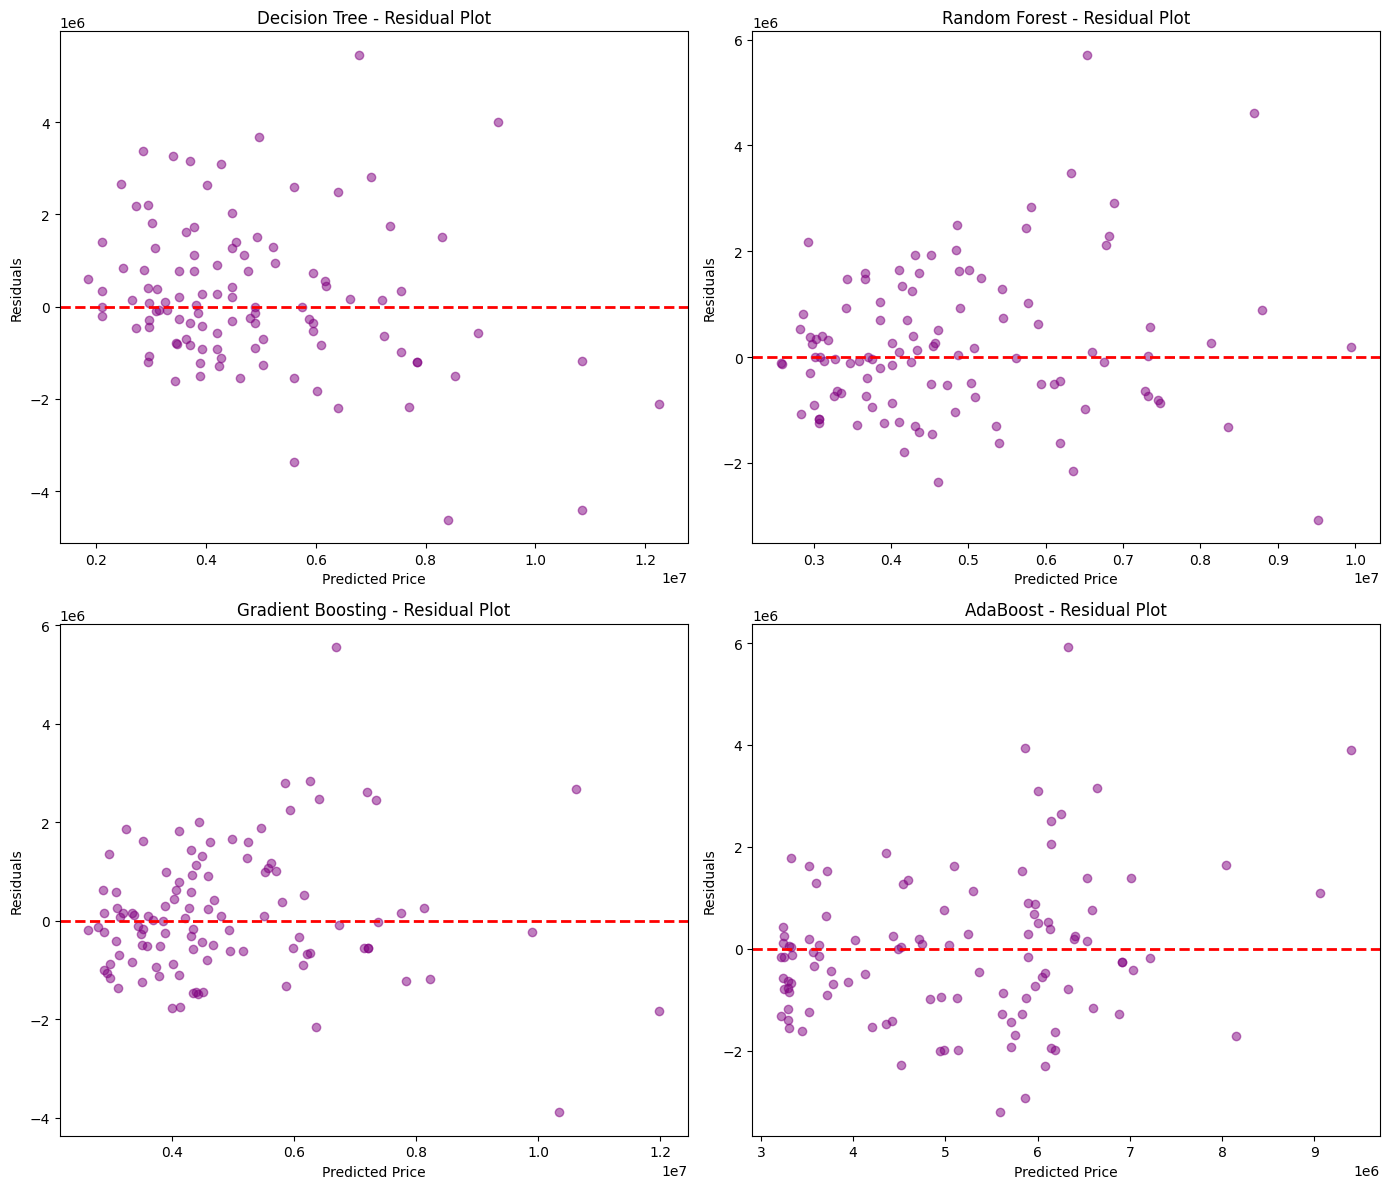

In [24]:
fig, axes = plt.subplots(2, 2, figsize=(14, 12))

for idx, (name, pred) in enumerate(models_pred):
    ax = axes[idx // 2, idx % 2]
    residuals = y_test - pred
    ax.scatter(pred, residuals, alpha=0.5, color='purple')
    ax.axhline(y=0, color='red', linestyle='--', lw=2)
    ax.set_xlabel('Predicted Price')
    ax.set_ylabel('Residuals')
    ax.set_title(f'{name} - Residual Plot')

plt.tight_layout()
plt.show()